# Classification of anime style characters/real world person

### Description of the dataset / データセットについて

--- 

This dataset consists of 30 images which contain 15(Train set 10 + Test set 5) anime style characters and 15(Train set 10 + Test set 5) real world person.

In a word, there are total 20 train data and 10 test data.

The anime style character is labeled as "0", while the real world person is labeled as "1".

Each image is in the size of 100 x 100.

The purpose of this project is that, given an image (which contains a person's face), clarify whether it is an anime style character or a real world person.

---

## Data / データ

### Load the data / データの読み込み

In [1]:
import cv2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

def plot_digit(features):
    # features is a vector of shape (30000,)
    # numpy reshape method to transform the vector in a 2D array of shape (100, 100, 3)
    image = features.reshape(100, 100, 3)
    # matplotlib function to show an image
    plt.figure()
    plt.imshow(image, cmap = mpl.cm.binary, interpolation="nearest")
    plt.axis("off")

X_train = np.empty((20, 30000), int)
y_train = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
X_test = np.empty((10, 30000), int)
y_test = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20, 30000)
(20,)
(10, 30000)
(10,)


In [2]:
print("===========Loading train data============")
for i in range(20):
    if i < 10:
        imagefile = "data/train_set/Anime_" + str(i) + ".png"
        I = cv2.imread(imagefile)
        I = I[:,:,[2,1,0]]
        X_train[i] = I.reshape(30000,)
    else:
        imagefile = "data/train_set/Real_" + str(i-10) + ".png"
        I = cv2.imread(imagefile)
        I = I[:,:,[2,1,0]]
        X_train[i] = I.reshape(30000,)
print("==========Loading Completed============")

===========Loading train data============
==========Loading Completed============


In [3]:
print("===========Loading test data============")
for i in range(10):
    if i < 5:
        imagefile = "data/test_set/Anime_" + str(i) + ".png"
        I = cv2.imread(imagefile)
        I = I[:,:,[2,1,0]]
        X_test[i] = I.reshape(30000,)
    else:
        imagefile = "data/test_set/Real_" + str(i-5) + ".png"
        I = cv2.imread(imagefile)
        I = I[:,:,[2,1,0]]
        X_test[i] = I.reshape(30000,)
print("==========Loading Completed============")

===========Loading test data============
==========Loading Completed============


### Plot the data / データのプロット

============Train set images============
Anime style character
Anime style character
Anime style character
Anime style character
Anime style character
Anime style character
Anime style character
Anime style character
Anime style character
Anime style character
Real world person
Real world person
Real world person
Real world person
Real world person
Real world person
Real world person
Real world person
Real world person
Real world person


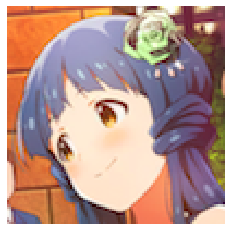

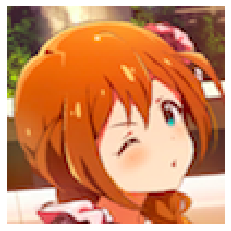

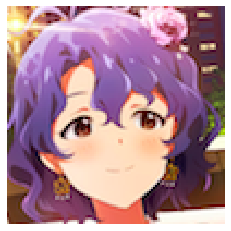

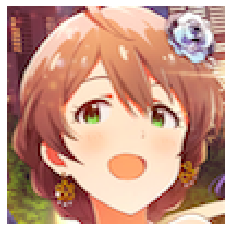

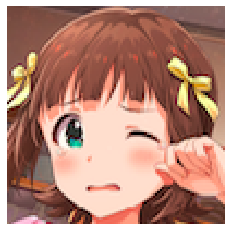

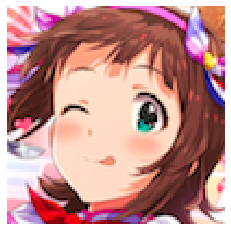

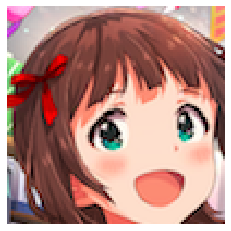

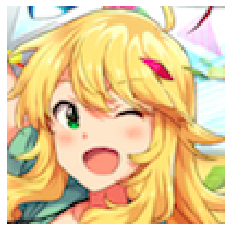

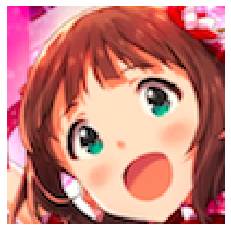

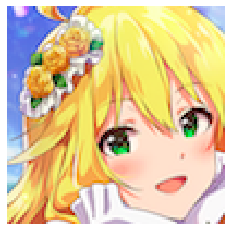

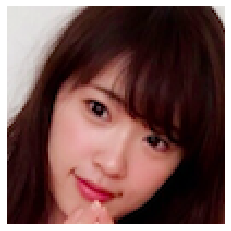

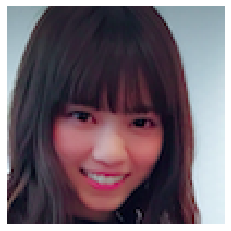

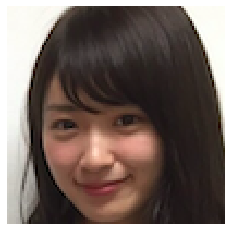

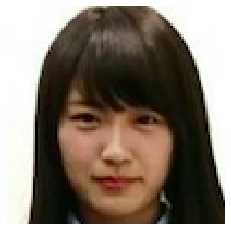

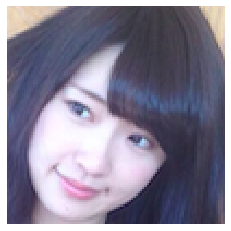

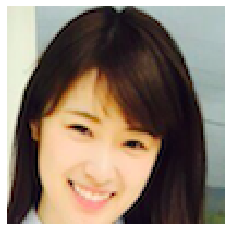

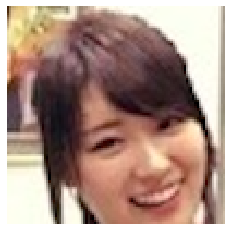

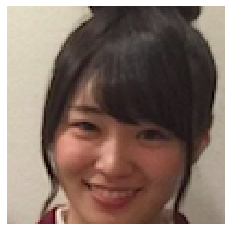

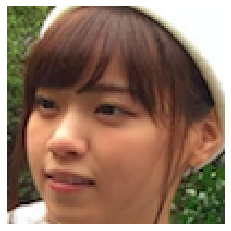

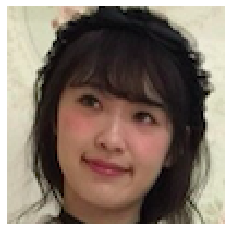

In [4]:
print("============Train set images============")
for i in range(20):
    plot_digit(X_train[i])
    if y_train[i] == 0:
        print("Anime style character")
    else:
        print("Real world person")

============Test set images============
Anime style character
Anime style character
Anime style character
Anime style character
Anime style character
Real world person
Real world person
Real world person
Real world person
Real world person


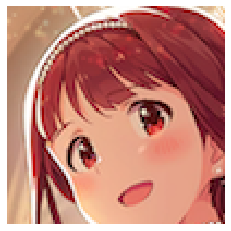

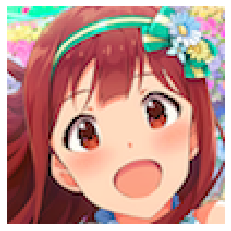

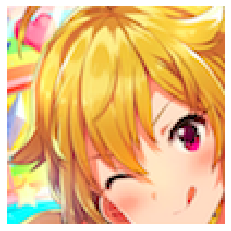

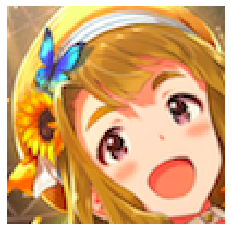

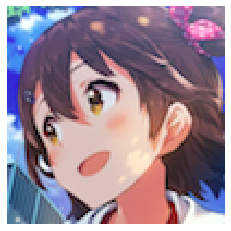

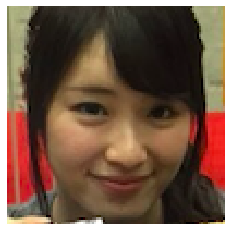

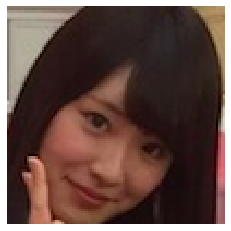

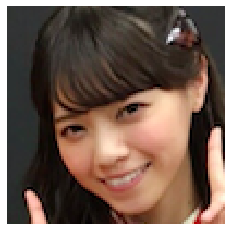

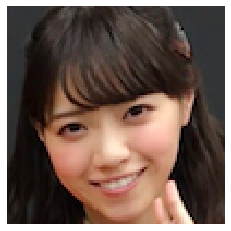

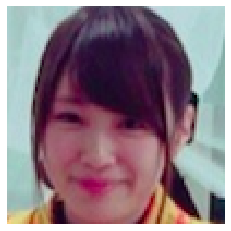

In [5]:
print("============Test set images============")
for i in range(10):
    plot_digit(X_test[i])
    if y_test[i] == 0:
        print("Anime style character")
    else:
        print("Real world person")

### Prepare the data / データの準備

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train_raw = X_train
X_train = scaler.transform(X_train_raw)

X_test_raw = X_test
X_test = scaler.transform(X_test_raw)

## Classification / 分類

### Training of the classifier / 分類器の訓練

In [7]:
from sklearn.svm import LinearSVC
linear_SVC = LinearSVC()
linear_SVC.fit(X_train, y_train); 

In [8]:
y_pred = linear_SVC.predict(X_test)

### Show results / 結果の表示

In [9]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_pred)
print(CM)

[[5 0]
 [0 5]]


In [10]:
from sklearn.metrics import accuracy_score
A = accuracy_score(y_test,  y_pred)
print("Accuracy: {:.02f}".format(A))

Accuracy: 1.00


Image label: 0
Prediction: 0
This is a correct prediction


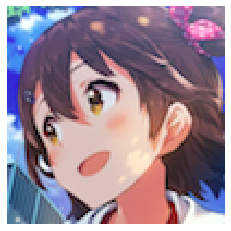

In [11]:
# Show one example
i = 4
plot_digit(X_test_raw[i])

print("Image label:", y_test[i])

y_pred = linear_SVC.predict([X_test[i]])[0]
print("Prediction:", y_pred)

if y_pred == y_test[i]:
    print("This is a correct prediction")
else:
    print("This is not a correct prediction")    

## Conclusion / 結論

--- 


We can find that LinearSVC method has done a great job and achieved our purpose with a very high accuracy.


---